In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [2]:
train=pd.read_csv("../input/spaceship-titanic/train.csv")
test=pd.read_csv("../input/spaceship-titanic/test.csv")
sample=pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.drop("Name",axis=1,inplace=True)
train.drop("PassengerId",axis=1,inplace=True)



In [5]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [6]:
train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

<Figure size 576x288 with 0 Axes>

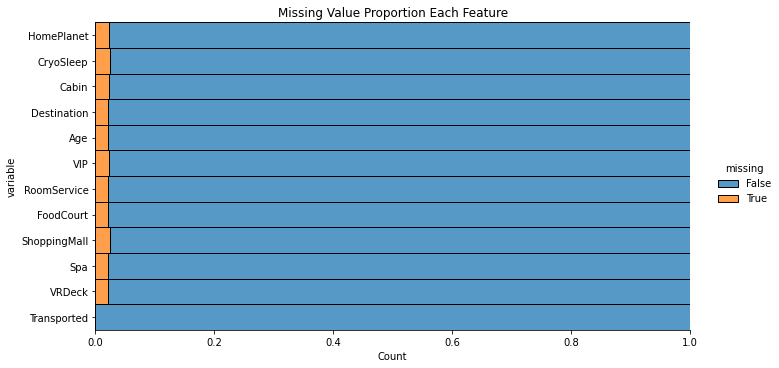

In [7]:
plt.figure(figsize=(8,4))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.title("Missing Value Proportion Each Feature");

In [8]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [9]:
X=train.fillna(0)

In [10]:
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.234326,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.912090,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
X.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [12]:
num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']

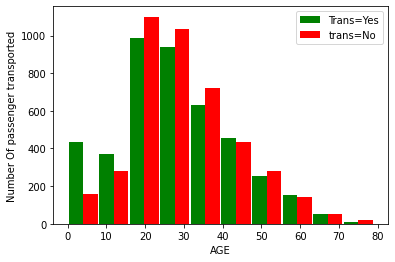

In [13]:
Trans_no = train[train.Transported==False].Age     
Trans_yes = train[train.Transported==True].Age     

plt.xlabel("AGE")
plt.ylabel("Number Of passenger transported")




plt.hist([Trans_yes, Trans_no], rwidth=0.95, color=['green','red'],label=['Trans=Yes','trans=No'])
plt.legend()

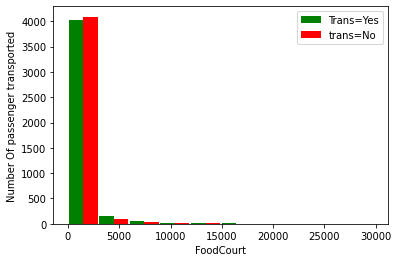

In [14]:
Trans_no = train[train.Transported==False].FoodCourt    
Trans_yes = train[train.Transported==True].FoodCourt

plt.xlabel("FoodCourt")
plt.ylabel("Number Of passenger transported")




plt.hist([Trans_yes, Trans_no], rwidth=0.95, color=['green','red'],label=['Trans=Yes','trans=No'])
plt.legend()

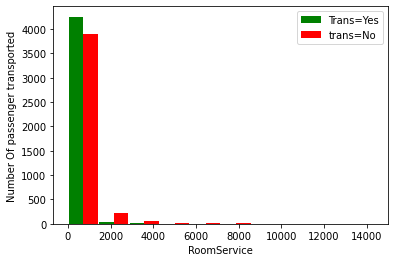

In [15]:
Trans_no = train[train.Transported==False].RoomService    
Trans_yes = train[train.Transported==True].RoomService
plt.xlabel("RoomService")
plt.ylabel("Number Of passenger transported")




plt.hist([Trans_yes, Trans_no], rwidth=0.95, color=['green','red'],label=['Trans=Yes','trans=No'])
plt.legend()

In [16]:
def print_unique_col_values(X):
       for column in X:
            if X[column].dtypes=='object':
                print(f'{column}: {X[column].unique()}') 

In [17]:
X['HomePlanet'].replace({'Earth':1,'Mars':0,'Europa':2},inplace=True)
X['Destination'].replace({'TRAPPIST-1e':1,'PSO J318.5-22':0,'55 Cancri e':2},inplace=True)

X['CryoSleep'].replace({ 'True':1,'False':0},inplace=True)
#X['VIP'].replace({ 'Yes':1,'NO':0},inplace=True)
#X['Transported'].replace({ True:1,False:0},inplace=True)


In [18]:
X.dtypes

HomePlanet        int64
CryoSleep        object
Cabin            object
Destination       int64
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [19]:
print_unique_col_values(X)

CryoSleep: [False True]
Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
VIP: [False True]


In [20]:
for col in X:
    print(f'{col}: {X[col].unique()}') 

HomePlanet: [2 1 0]
CryoSleep: [False True]
Cabin: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination: [1 0 2]
Age: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61. 50.
 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71. 75.
 70. 76. 78. 73. 66. 69. 72. 77.]
VIP: [False True]
RoomService: [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt: [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall: [   0.   25.  371. ... 1085.  510. 1872.]
Spa: [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck: [   0.   44.   49. ... 1164.  971. 3235.]
Transported: [False  True]


In [21]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,False,B/0/P,1,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,False,F/0/S,1,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,False,A/0/S,1,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,2,False,A/0/S,1,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,False,F/1/S,1,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [22]:
X.replace({'VIP':{True:1,False:0},'CryoSleep':{True:1,False:0},"Transported":{True:1,False:0}},inplace=True)

In [23]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,0,B/0/P,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,F/0/S,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,2,0,A/0/S,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,2,0,A/0/S,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,0,F/1/S,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [24]:
X.dtypes

HomePlanet        int64
CryoSleep         int64
Cabin            object
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

In [25]:
cols_to_scale = ['Age','Spa','RoomService','FoodCourt','VRDeck',"ShoppingMall"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [26]:
X = pd.get_dummies(data=X, columns=['Cabin'])
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       ...
       'Cabin_G/996/S', 'Cabin_G/998/P', 'Cabin_G/998/S', 'Cabin_G/999/P',
       'Cabin_G/999/S', 'Cabin_T/0/P', 'Cabin_T/1/P', 'Cabin_T/2/P',
       'Cabin_T/2/S', 'Cabin_T/3/P'],
      dtype='object', length=6572)

In [27]:
for col in X:
    print(f'{col}: {X[col].unique()}')

HomePlanet: [2 1 0]
CryoSleep: [0 1]
Destination: [1 0 2]
Age: [0.49367089 0.30379747 0.73417722 0.41772152 0.20253165 0.55696203
 0.32911392 0.35443038 0.44303797 0.17721519 0.43037975 0.56962025
 0.40506329 0.60759494 0.39240506 0.34177215 0.         0.01265823
 0.62025316 0.36708861 0.12658228 0.08860759 0.26582278 0.78481013
 0.18987342 0.5443038  0.59493671 0.02531646 0.25316456 0.29113924
 0.37974684 0.21518987 0.69620253 0.05063291 0.24050633 0.70886076
 0.3164557  0.48101266 0.4556962  0.27848101 0.2278481  0.53164557
 0.46835443 0.16455696 0.10126582 0.50632911 0.03797468 0.6835443
 0.11392405 0.07594937 0.81012658 0.84810127 0.7721519  0.63291139
 0.51898734 0.72151899 0.13924051 0.65822785 0.64556962 0.58227848
 0.75949367 0.79746835 0.74683544 0.06329114 1.         0.86075949
 0.93670886 0.15189873 0.67088608 0.82278481 0.89873418 0.94936709
 0.88607595 0.96202532 0.98734177 0.92405063 0.83544304 0.87341772
 0.91139241 0.97468354]
VIP: [0 1]
RoomService: [0.         0.00760

In [28]:

X_train= X.drop(["Transported"],axis=1)

Y_train =train.drop(["HomePlanet","Destination","VIP","CryoSleep","Age","RoomService","FoodCourt","ShoppingMall","VRDeck","Spa","Cabin"],axis=1)

In [29]:
X.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_G/996/S,Cabin_G/998/P,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P
0,2,0,1,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_G/996/S,Cabin_G/998/P,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P
0,2,0,1,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,...,0,0,0,0,0,0,0,0,0,0
3,2,0,1,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Y_train.dtypes

Transported    bool
dtype: object

In [32]:
X_train=X_train.astype(int)

In [33]:
X_train.dtypes

HomePlanet     int64
CryoSleep      int64
Destination    int64
Age            int64
VIP            int64
               ...  
Cabin_T/0/P    int64
Cabin_T/1/P    int64
Cabin_T/2/P    int64
Cabin_T/2/S    int64
Cabin_T/3/P    int64
Length: 6571, dtype: object

In [34]:
X_train.shape

(8693, 6571)

In [35]:
Y_train.dtypes

Transported    bool
dtype: object

In [36]:
Y_train.shape

(8693, 1)

In [37]:
Y_train=Y_train.astype(int)

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(6571,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50)

2022-07-23 20:58:43.198893: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-23 20:58:44.383415: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
272/272 [==============================] - 2s 3ms/step - loss: 0.6108 - accuracy: 0.6876
Epoch 2/50
272/272 [==============================] - 1s 3ms/step - loss: 0.5064 - accuracy: 0.7421
Epoch 3/50
272/272 [==============================] - 1s 3ms/step - loss: 0.3237 - accuracy: 0.8756
Epoch 4/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1817 - accuracy: 0.9304
Epoch 5/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1436 - accuracy: 0.9362
Epoch 6/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1249 - accuracy: 0.9373
Epoch 7/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1185 - accuracy: 0.9375
Epoch 8/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1141 - accuracy: 0.9411
Epoch 9/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.9426
Epoch 10/50
272/272 [==============================] - 1s 3ms/step - loss: 0.1009 - accuracy: 0.9436

In [39]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [40]:
test.replace({'VIP':{True:1,False:0},'CryoSleep':{True:1,False:0}},inplace=True)
test['HomePlanet'].replace({'Earth':1,'Mars':0,'Europa':2},inplace=True)
test['Destination'].replace({'TRAPPIST-1e':1,'PSO J318.5-22':0,'55 Cancri e':2},inplace=True)

In [41]:
x_test=test.drop(["PassengerId","Name"],axis=1)


In [42]:
x_test.shape

(4277, 11)

In [43]:
x_test = pd.get_dummies(data=x_test, columns=['Cabin'])
x_test.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       ...
       'Cabin_G/993/P', 'Cabin_G/994/P', 'Cabin_G/995/P', 'Cabin_G/996/P',
       'Cabin_G/997/P', 'Cabin_G/997/S', 'Cabin_T/0/S', 'Cabin_T/1/S',
       'Cabin_T/3/S', 'Cabin_T/4/P'],
      dtype='object', length=3275)

In [44]:
x_test.dtypes


HomePlanet       float64
CryoSleep        float64
Destination      float64
Age              float64
VIP              float64
                  ...   
Cabin_G/997/S      uint8
Cabin_T/0/S        uint8
Cabin_T/1/S        uint8
Cabin_T/3/S        uint8
Cabin_T/4/P        uint8
Length: 3275, dtype: object

In [45]:
X_test=x_test.fillna(0)

In [46]:
X_test.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
                ..
Cabin_G/997/S    0
Cabin_T/0/S      0
Cabin_T/1/S      0
Cabin_T/3/S      0
Cabin_T/4/P      0
Length: 3275, dtype: int64

In [47]:
X_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_G/993/P,Cabin_G/994/P,Cabin_G/995/P,Cabin_G/996/P,Cabin_G/997/P,Cabin_G/997/S,Cabin_T/0/S,Cabin_T/1/S,Cabin_T/3/S,Cabin_T/4/P
0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,1.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,1.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,1.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_test.shape

(4277, 3275)

In [49]:
X_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_G/993/P,Cabin_G/994/P,Cabin_G/995/P,Cabin_G/996/P,Cabin_G/997/P,Cabin_G/997/S,Cabin_T/0/S,Cabin_T/1/S,Cabin_T/3/S,Cabin_T/4/P
0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,1.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,1.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,1.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train.shape

(8693, 6571)

In [51]:
xtest=X_test

In [52]:
for i in range(3275,6571):
    xtest[i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [53]:
xtest.shape

(4277, 6571)

In [54]:
xtest.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,6561,6562,6563,6564,6565,6566,6567,6568,6569,6570
0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,1.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,1.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,1.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_train.shape

(8693, 6571)

In [56]:
y_test=sample

In [57]:
Y_test=y_test.drop("PassengerId",axis=1)

In [58]:
Y_test["Transported"]=Y_test["Transported"].astype(int)

In [59]:
Y_test.dtypes

Transported    int64
dtype: object

In [60]:
Y_test.shape

(4277, 1)

In [61]:
model.evaluate(xtest, Y_test)

134/134 [==============================] - 0s 2ms/step - loss: 1187.2537 - accuracy: 0.7646


[1187.253662109375, 0.7645546197891235]

In [62]:
yp = model.predict(xtest)

In [63]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [64]:
y_pred

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [65]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87      4277
           1       0.00      0.00      0.00         0

    accuracy                           0.76      4277
   macro avg       0.50      0.38      0.43      4277
weighted avg       1.00      0.76      0.87      4277



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

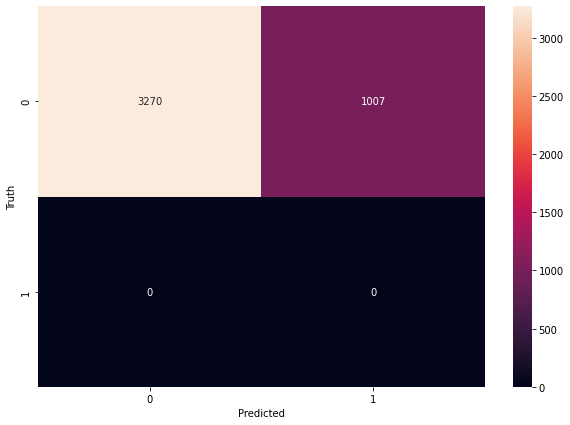

In [66]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ACCURACY

In [67]:
round((3189+0)/(3189+1088+0+0),2)

0.75

In [68]:
submission_df=sample.drop("Transported",axis=1)

In [69]:
submission_df['Transported'] = y_pred
submission_df.to_csv('submission_tf_pretrain.csv', index=False)
submission_df.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,0
3,0021_01,1
4,0023_01,1
